0.6341398149268204 4.761539535366791
lambda = 0.0580


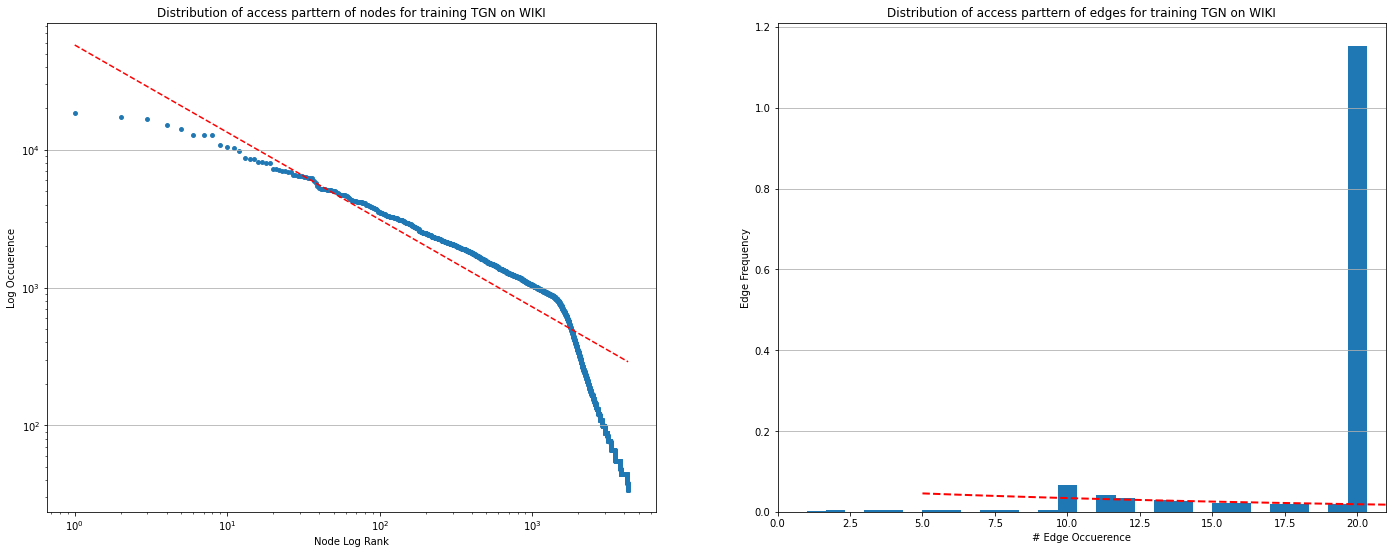

1.2642079706755711 7.112471792519991
lambda = 0.0552


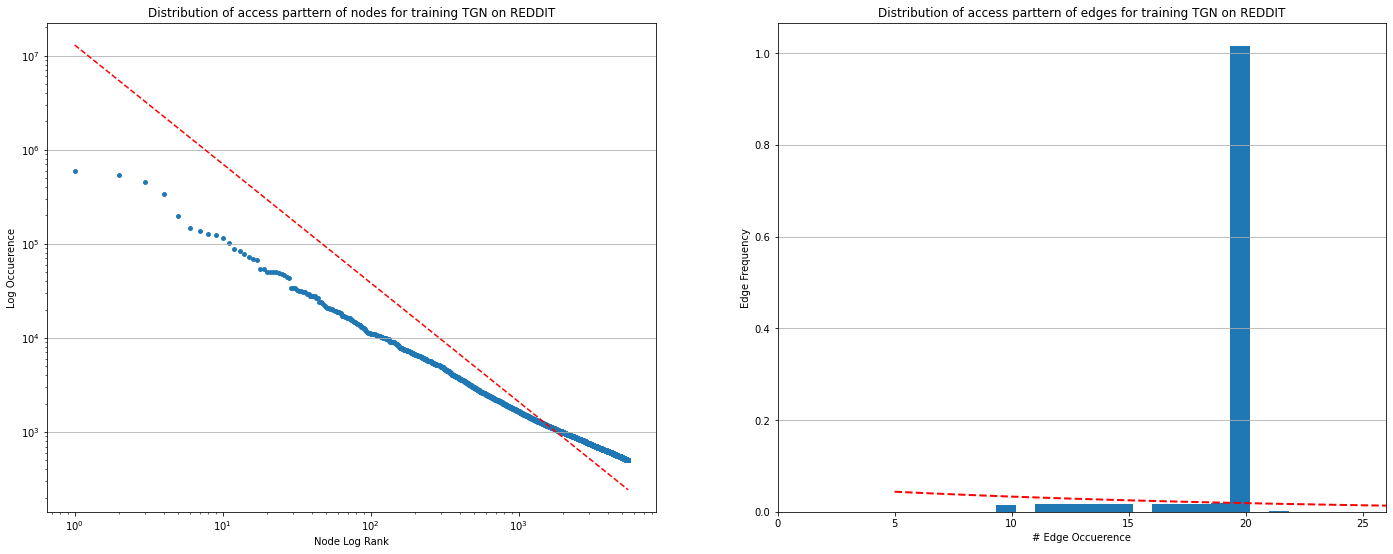

1.2707976509673509 6.96110032759099


KeyboardInterrupt: 

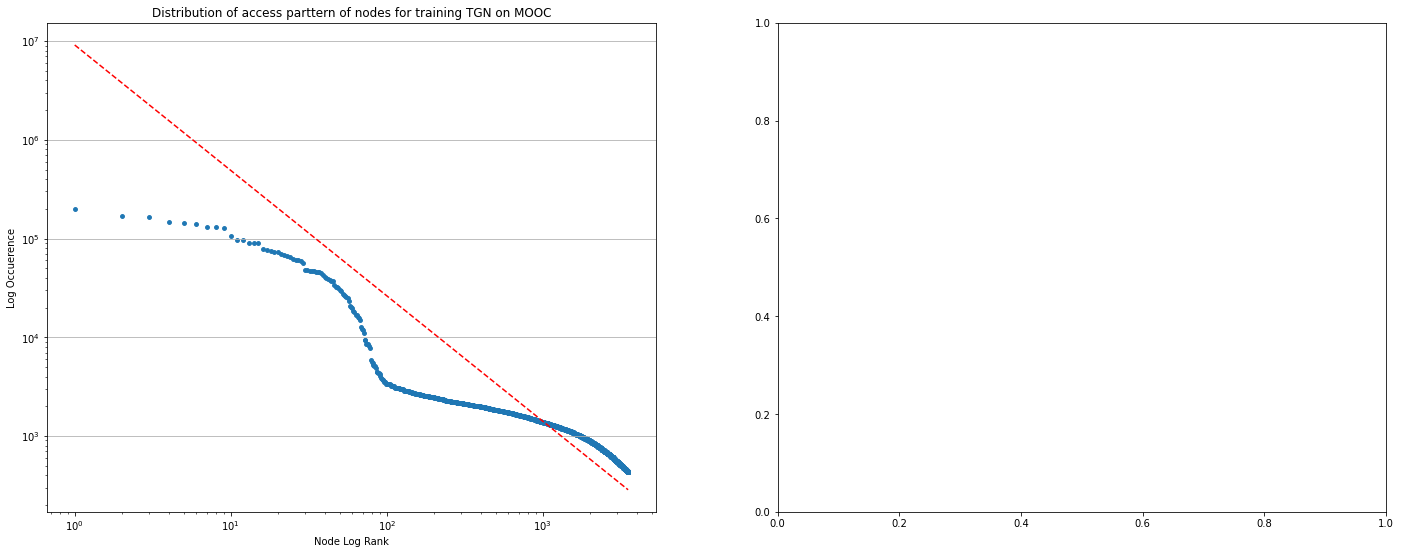

In [124]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import expon
import itertools
import pickle


models = ['TGN', 'TGAT', 'GRAPHSAGE']
datasets = ['WIKI', 'REDDIT', 'MOOC', 'LASTFM']


param_space = itertools.product(
    models, datasets)

for param in param_space:
    with open("{}_{}_node_to_cnt.pickle".format(*param), 'rb') as f:
        node_to_cnt = pickle.load(f)
    with open("{}_{}_edge_to_cnt.pickle".format(*param), 'rb') as f:
        edge_to_cnt = pickle.load(f)

    def log_rank_freq(d, ax, type):
        values = sorted(d.values(), reverse=True)
        ranks = range(1, len(values)+1)

        x = np.log10(values)
        y = np.log10(ranks)
        
        coeffs = np.polyfit(x, y, 1)
        alpha = -coeffs[0]
        C = 10**coeffs[1]
        print(alpha, coeffs[1])

        ax.scatter(ranks, values, s=15)

        x = np.logspace(np.log10(ranks[0]), np.log10(ranks[-1]), num=len(ranks))
        y = C * x**(-alpha) 
        ax.loglog(x, y, linestyle='--', color='r')
        ax.grid(axis='y')
        ax.set_xlabel("Node Log Rank")
        ax.set_ylabel("Log Occuerence")
        ax.set_title("Distribution of access parttern of nodes for training {} on {}".format(*param))

    def hist(d, ax, type):
        data = list(d.values())
        ax.hist(data, bins=30, density=True)
        ax.set_xlabel('# {} Occuerence'.format(type))
        ax.set_ylabel('{} Frequency'.format(type))
        ax.set_xlim((0, max(data)))
        ax.grid(axis='y')
        
        # 拟合指数分布
        loc, scale = expon.fit(data)
        pdf = expon.pdf(np.linspace(5, max(data), 100), loc, scale)
        ax.plot(np.linspace(5, max(data), 100), pdf, 'r--', linewidth=2)
        print("lambda = {:.4f}".format(1/scale))
        ax.set_title("Distribution of access parttern of edges for training {} on {}".format(*param))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 9)
    log_rank_freq(node_to_cnt, ax1, 'Node')
    hist(edge_to_cnt, ax2, 'Edge')

    plt.show()